In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

from optionslib.math.integration import Integrator, RectangleConfig

In [13]:
# create integrator object
start, end = 0, np.pi / 2.0
integrator = Integrator(
    default_start=start,
    default_end=end,
)
print(integrator)

Integrator(default_config=None, default_start=0, default_end=1.5707963267948966, _Integrator__INTEGRATION_WORKER_MAP={<class 'optionslib.math.integration.integration_schema_configs.RectangleConfig'>: <function rectangle_rule at 0x0000012E7FAEAFC0>})


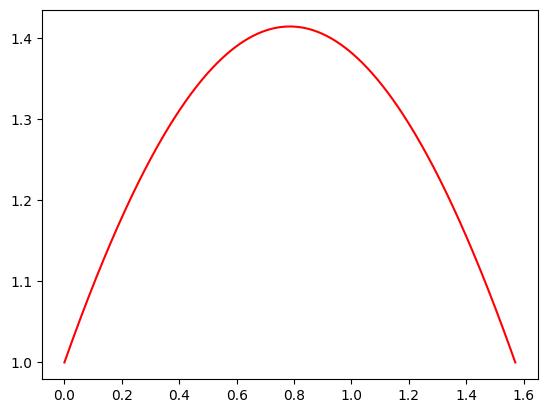

In [14]:
# function to integrate
f = lambda x: np.sin(x) + np.cos(x)
x_points = np.linspace(start, end, 10_000)
y_points = f(x_points)
plt.plot(x_points, y_points, color="red")
plt.show()

In [15]:
# scipy is a breeze and very accurate benchmark
scipy_quad, err = quad(f, start, end)
print(scipy_quad)

1.9999999999999998


In [16]:
# as visible very terrible performance
for i in range(20):
    area = integrator(f, config=RectangleConfig(steps=2**i))
    print(f"{i}: {area:.8f} \t {abs(scipy_quad-area):.8f}")

0: 1.57079633 	 0.42920367
1: 1.57079633 	 0.42920367
2: 1.85827201 	 0.14172799
3: 1.93899991 	 0.06100009
4: 1.97146098 	 0.02853902
5: 1.98617282 	 0.01382718
6: 1.99319170 	 0.00680830
7: 1.99662155 	 0.00337845
8: 1.99831712 	 0.00168288
9: 1.99916014 	 0.00083986
10: 1.99958046 	 0.00041954
11: 1.99979033 	 0.00020967
12: 1.99989519 	 0.00010481
13: 1.99994760 	 0.00005240
14: 1.99997380 	 0.00002620
15: 1.99998690 	 0.00001310
16: 1.99999345 	 0.00000655
17: 1.99999673 	 0.00000327
18: 1.99999836 	 0.00000164
19: 1.99999918 	 0.00000082
